In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_30cm = "/content/30cm.xlsx"
file_60cm = "/content/60cm.xlsx"

data_30cm = pd.read_excel(file_30cm)
data_60cm = pd.read_excel(file_60cm)

In [3]:
data_30cm.head()

,Date,Temperature,pH,Turbidity
0,2020-01-15 16:00:35,20.99,7.81,197
1,2020-01-15 16:01:33,20.99,7.81,197
2,2020-01-15 16:02:33,20.98,7.81,197
3,2020-01-15 16:03:22,20.98,7.81,197
4,2020-01-15 16:04:26,20.98,7.81,197


In [4]:
data_60cm.head()

,Date,Temperature,Turbidity
0,2020-01-15 16:00:35,22.54,134
1,2020-01-15 16:01:33,22.54,134
2,2020-01-15 16:02:33,22.54,134
3,2020-01-15 16:03:22,22.54,134
4,2020-01-15 16:04:26,22.54,134


In [5]:
data_30cm['Datetime'] = pd.to_datetime(data_30cm['Date'], errors="coerce")
data_60cm['Datetime'] = pd.to_datetime(data_60cm['Date'], errors="coerce")

In [6]:
# Summary statistics
print("Summary statistics for 30 cm depth:")
print(data_30cm.describe())
print("\nSummary statistics for 60 cm depth:")
print(data_60cm.describe())

Summary statistics for 30 cm depth:
       Temperature           pH    Turbidity                       Datetime
count  9623.000000  9623.000000  9623.000000                           9623
mean     20.004782     7.757886   215.485192  2020-01-19 02:14:18.689701632
min      15.600000     6.980000   194.000000            2020-01-15 16:00:35
25%      18.350000     7.380000   202.000000            2020-01-17 10:56:17
50%      19.950000     7.740000   212.000000            2020-01-19 00:21:20
75%      21.590000     8.230000   224.000000     2020-01-20 18:32:31.500000
max      23.810000     8.430000   249.000000            2020-01-22 16:25:32
std       2.049986     0.443601    16.179374                            NaN

Summary statistics for 60 cm depth:
       Temperature    Turbidity                       Datetime
count  9623.000000  9623.000000                           9623
mean     21.512562   141.853996  2020-01-19 02:14:18.689701632
min      18.080000   134.000000            2020-01-15 

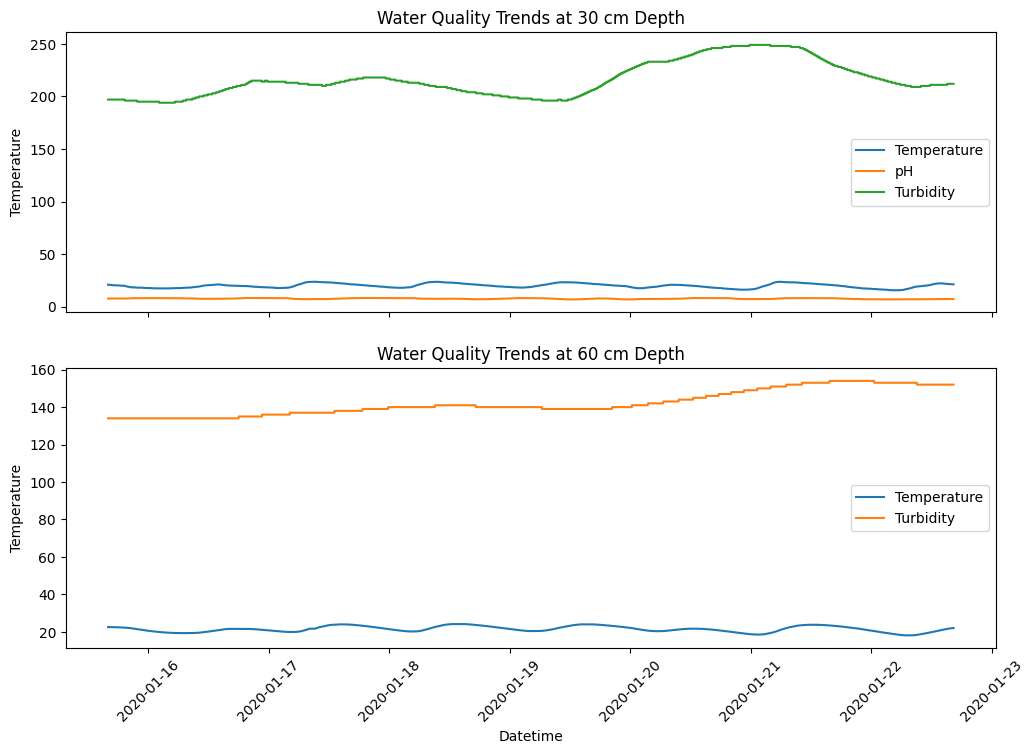

In [7]:
# Plot time series
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

sns.lineplot(data=data_30cm, x="Datetime", y="Temperature", label="Temperature", ax=axes[0])
sns.lineplot(data=data_30cm, x="Datetime", y="pH", label="pH", ax=axes[0])
sns.lineplot(data=data_30cm, x="Datetime", y="Turbidity", label="Turbidity", ax=axes[0])
axes[0].set_title("Water Quality Trends at 30 cm Depth")
axes[0].legend()

sns.lineplot(data=data_60cm, x="Datetime", y="Temperature", label="Temperature", ax=axes[1])
sns.lineplot(data=data_60cm, x="Datetime", y="Turbidity", label="Turbidity", ax=axes[1])
axes[1].set_title("Water Quality Trends at 60 cm Depth")
axes[1].legend()

plt.xticks(rotation=45)
plt.show()

## Check for missing values into datasets

In [8]:
# Check for missing values
print("\nMissing values in 30cm data:")
print(data_30cm.isnull().sum())
print("\nMissing values in 60cm data:")
print(data_60cm.isnull().sum())



Missing values in 30cm data:
Date           0
Temperature    0
pH             0
Turbidity      0
Datetime       0
dtype: int64

Missing values in 60cm data:
Date           0
Temperature    0
Turbidity      0
Datetime       0
dtype: int64


### Temperature

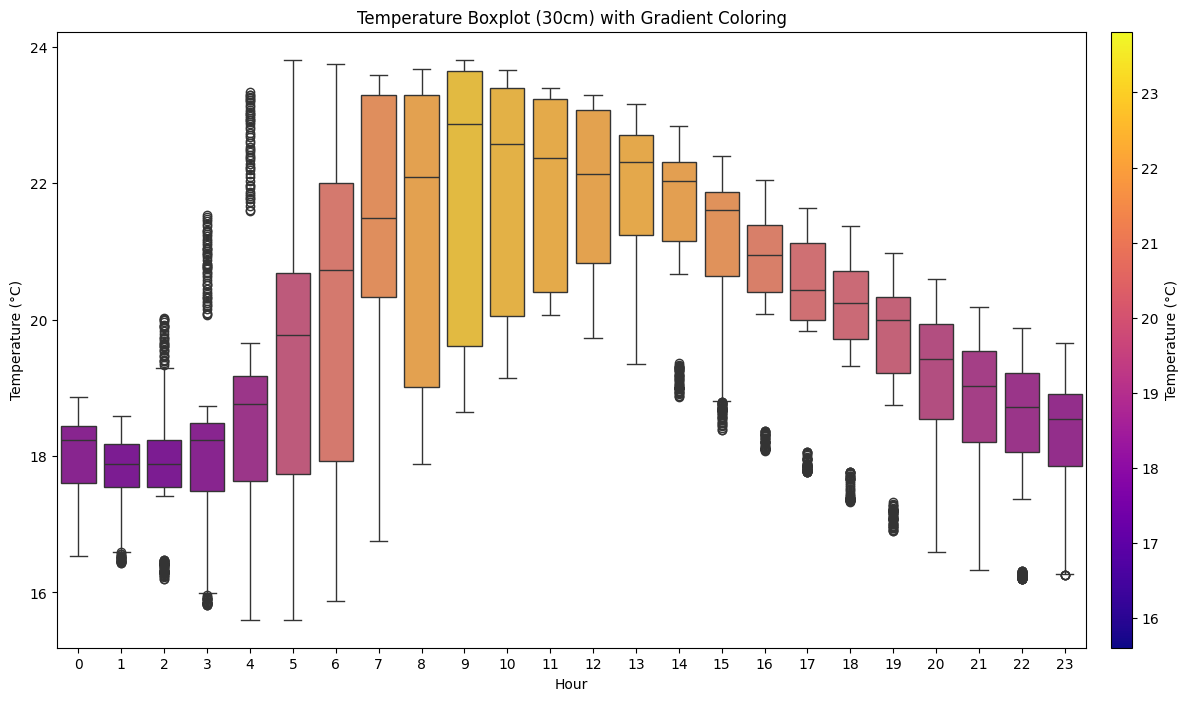

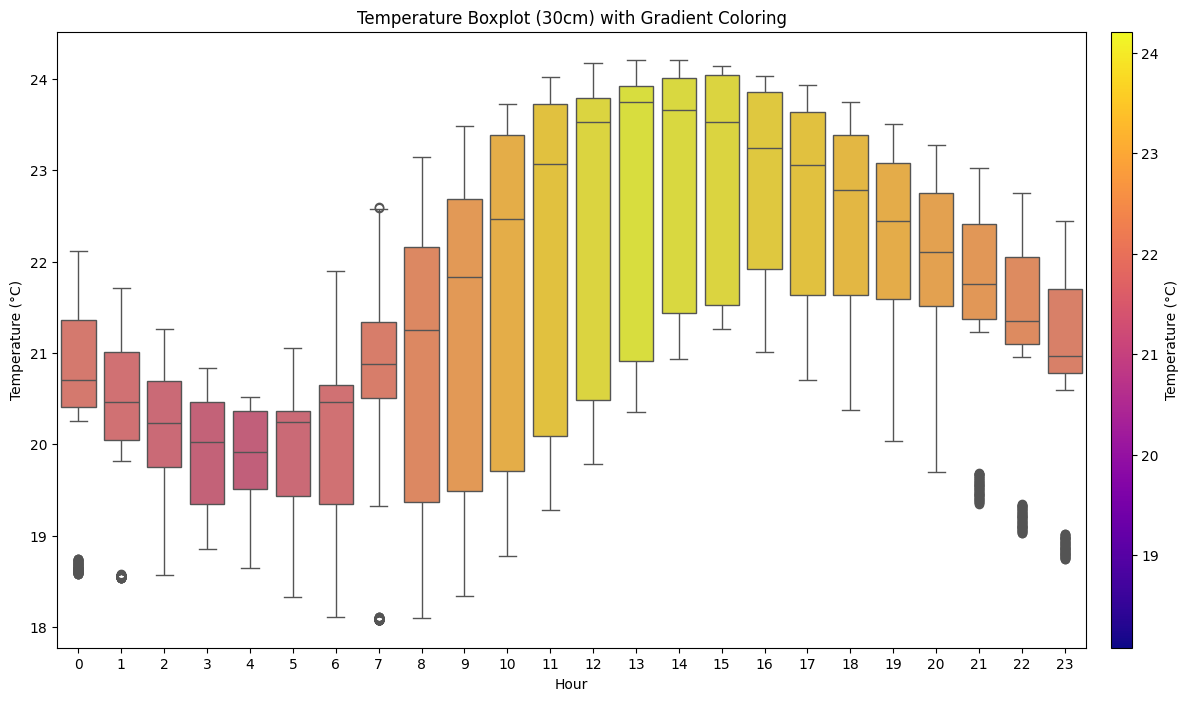

In [9]:
import matplotlib.patches as mpatches

# Diurnal Patterns (Day vs. Night Analysis)
data_30cm["Hour"] = data_30cm["Datetime"].dt.hour
data_60cm["Hour"] = data_60cm["Datetime"].dt.hour

cmap = plt.cm.plasma  # 'plasma' gives a nice temperature gradient, you can try 'coolwarm' or 'viridis'
# Normalize temperature values for mapping colors
norm_30cm = plt.Normalize(data_30cm["Temperature"].min(), data_30cm["Temperature"].max())
norm_60cm = plt.Normalize(data_60cm["Temperature"].min(), data_60cm["Temperature"].max())

color_mapping_30cm = {f"{hour}": cmap(norm_30cm(data_30cm[data_30cm["Hour"] == hour]["Temperature"].median())) for hour in range(24)}
color_mapping_60cm = {f"{hour}": cmap(norm_30cm(data_60cm[data_60cm["Hour"] == hour]["Temperature"].median())) for hour in range(24)}

# Convert the dictionary into a list of colors in order of appearance
palette_30cm = [color_mapping_30cm[f"{hour}"] for hour in sorted(data_30cm["Hour"].unique())]
palette_60cm = [color_mapping_60cm[f"{hour}"] for hour in sorted(data_60cm["Hour"].unique())]

# Create the figure and axis
plt.figure(figsize=(16, 8))

# Create a boxplot (without color first)
ax = sns.boxplot(x="Hour", y="Temperature", hue="Hour", data=data_30cm, palette=palette_30cm, legend=False)

# Add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_30cm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, aspect=30, pad=0.02)
cbar.set_label("Temperature (°C)")

# Labels and title
ax.set_title("Temperature Boxplot (30cm) with Gradient Coloring")
ax.set_ylabel("Temperature (°C)")

# Show plot
plt.show()

# Create the figure and axis
plt.figure(figsize=(16, 8))

# Create a boxplot (without color first)
ax = sns.boxplot(x="Hour", y="Temperature", hue="Hour", data=data_60cm, palette=palette_60cm, legend=False)

# Add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_60cm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, aspect=30, pad=0.02)
cbar.set_label("Temperature (°C)")

# Labels and title
ax.set_title("Temperature Boxplot (30cm) with Gradient Coloring")
ax.set_ylabel("Temperature (°C)")

# Show plot
plt.show()

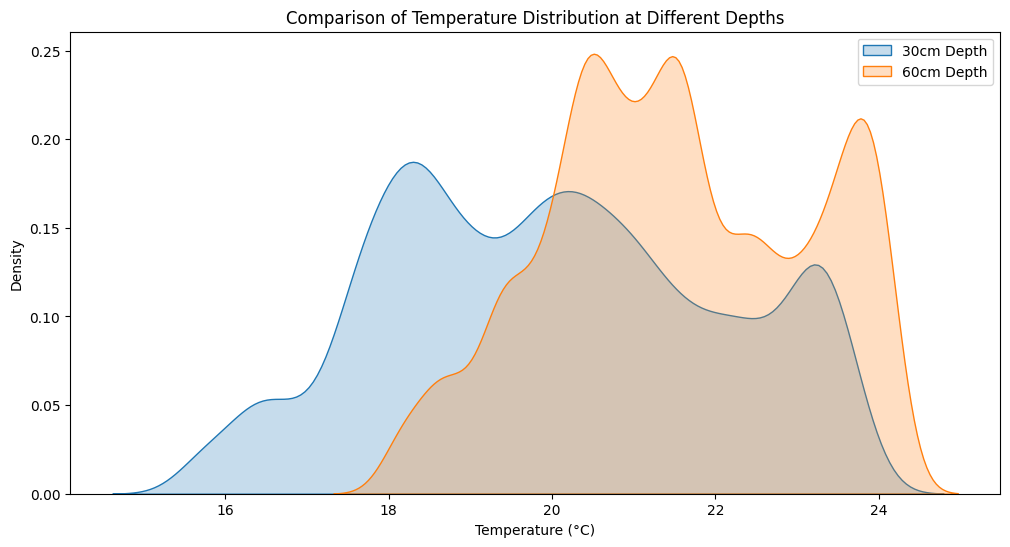

In [10]:
# Comparison of Depths
plt.figure(figsize=(12, 6))
sns.kdeplot(data_30cm["Temperature"], label="30cm Depth", fill=True)
sns.kdeplot(data_60cm["Temperature"], label="60cm Depth", fill=True)
plt.title("Comparison of Temperature Distribution at Different Depths")
plt.xlabel("Temperature (°C)")
plt.legend()
plt.show()

### Turbidity

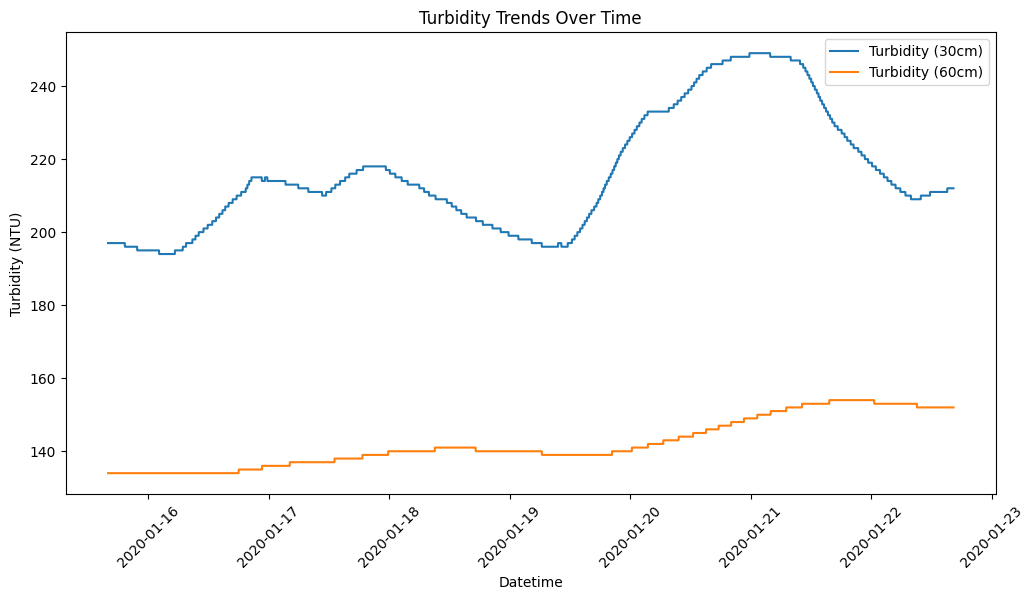

In [11]:
# Time-Series Analysis of Turbidity
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_30cm, x="Datetime", y="Turbidity", label="Turbidity (30cm)")
sns.lineplot(data=data_60cm, x="Datetime", y="Turbidity", label="Turbidity (60cm)")
plt.title("Turbidity Trends Over Time")
plt.xlabel("Datetime")
plt.ylabel("Turbidity (NTU)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


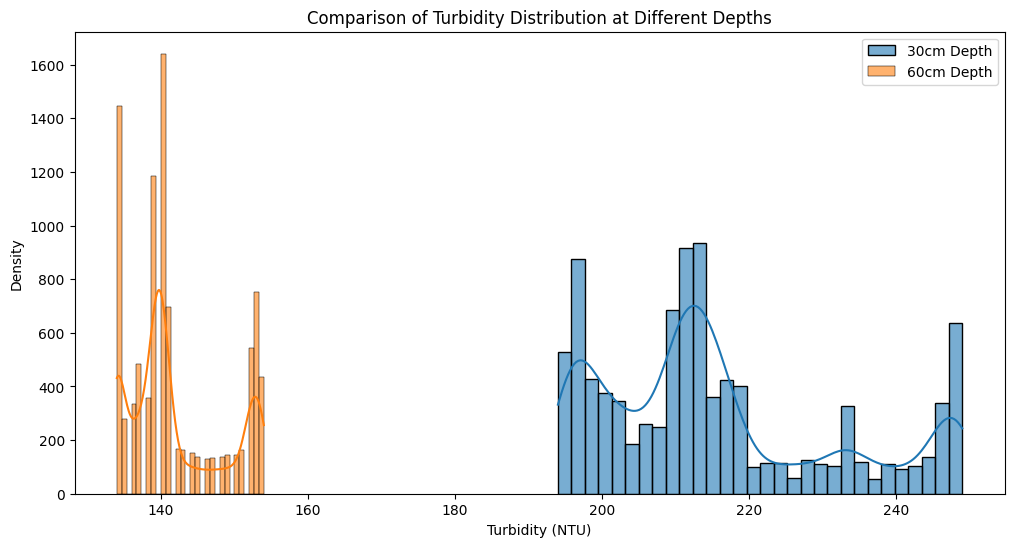

In [12]:
# Distribution Analysis of Turbidity
plt.figure(figsize=(12, 6))
sns.histplot(data_30cm["Turbidity"], bins=30, kde=True, label="30cm Depth", alpha=0.6)
sns.histplot(data_60cm["Turbidity"], bins=30, kde=True, label="60cm Depth", alpha=0.6)
plt.title("Comparison of Turbidity Distribution at Different Depths")
plt.xlabel("Turbidity (NTU)")
plt.ylabel("Density")
plt.legend()
plt.show()

### Correlation Matricies

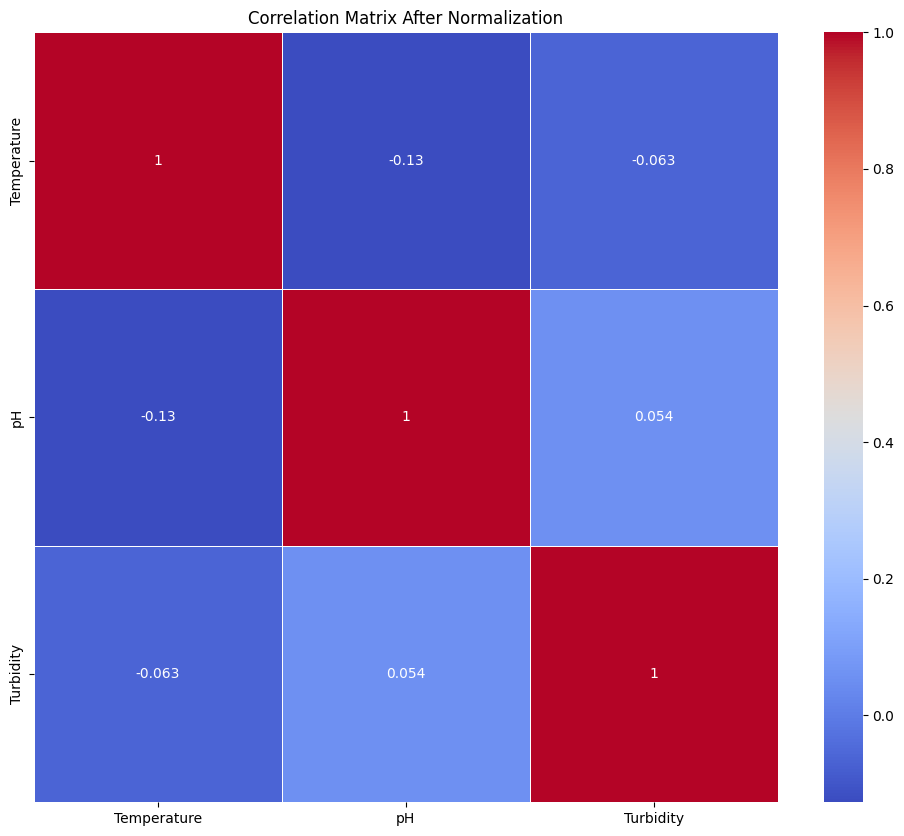

In [13]:
# Compute and visualize the correlation matrix
normalized_correlation_matrix_30cm = data_30cm[["Temperature", "pH", "Turbidity"]].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(normalized_correlation_matrix_30cm, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix After Normalization")
plt.show()

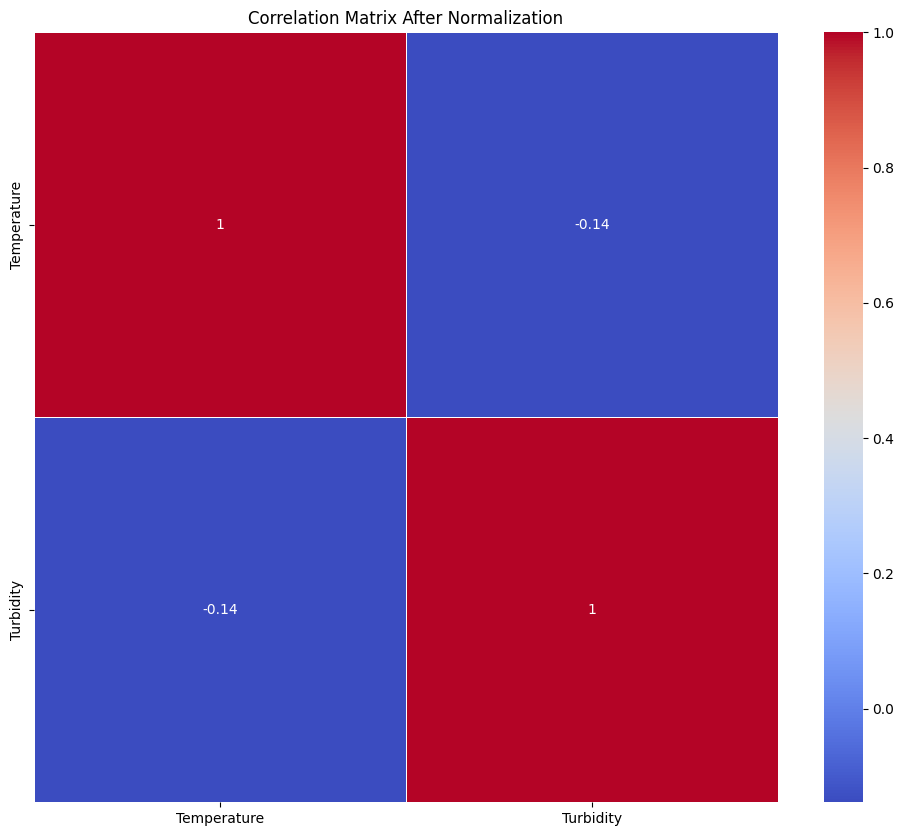

In [14]:
# Compute and visualize the correlation matrix
normalized_correlation_matrix_60cm = data_60cm[["Temperature", "Turbidity"]].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(normalized_correlation_matrix_60cm, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix After Normalization")
plt.show()

In [15]:
# Resampling data to get daily averages
data_30cm_no_date = data_30cm.drop('Date', axis=1)
data_30cm_no_date.set_index('Datetime', inplace=True)

data_60cm_no_date = data_60cm.drop('Date', axis=1)
data_60cm_no_date.set_index('Datetime', inplace=True)

# Resample data to different time frames
data_30cm_hourly = data_30cm_no_date.resample('h').mean()
data_30cm_daily = data_30cm_no_date.resample('D').mean()
data_30cm_weekly = data_30cm_no_date.resample('W').mean()

data_60cm_hourly = data_60cm_no_date.resample('h').mean()
data_60cm_daily = data_60cm_no_date.resample('D').mean()
data_60cm_weekly = data_60cm_no_date.resample('W').mean()

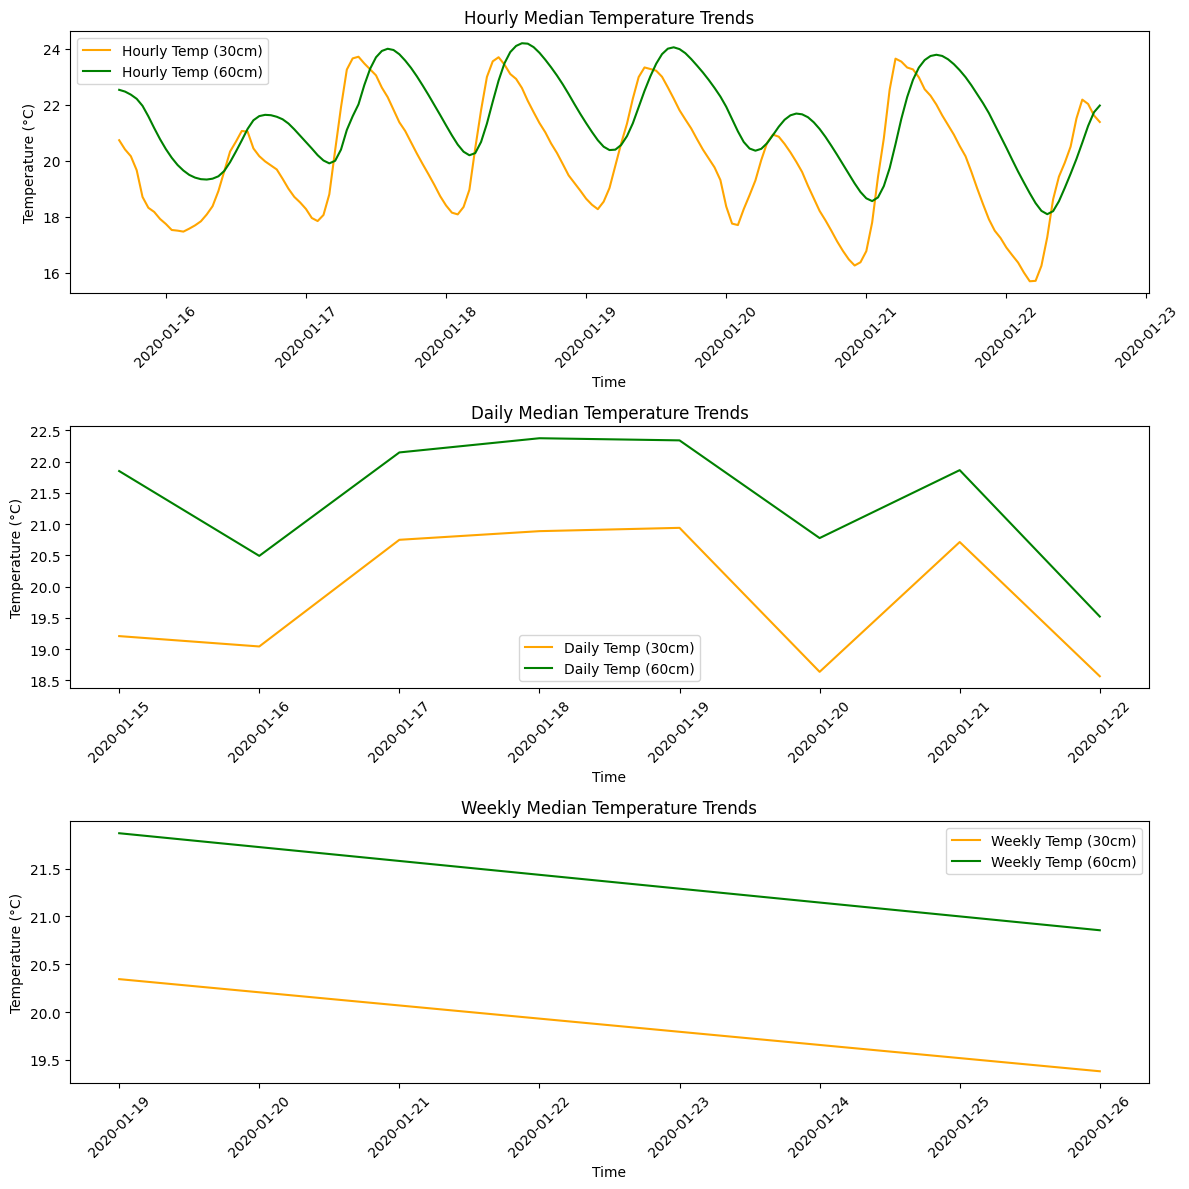

In [16]:
# Create subplots for different time frames
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=False)

# Hourly Trends
sns.lineplot(data=data_30cm_hourly, x="Datetime", y="Temperature", ax=axes[0], label="Hourly Temp (30cm)", color='orange')
sns.lineplot(data=data_60cm_hourly, x="Datetime", y="Temperature", ax=axes[0], label="Hourly Temp (60cm)", color='green')
axes[0].set_title("Hourly Median Temperature Trends")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Temperature (°C)")
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Daily Trends
sns.lineplot(data=data_30cm_daily, x="Datetime", y="Temperature", ax=axes[1], label="Daily Temp (30cm)", color='orange')
sns.lineplot(data=data_60cm_daily, x="Datetime", y="Temperature", ax=axes[1], label="Daily Temp (60cm)", color='green')
axes[1].set_title("Daily Median Temperature Trends")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Temperature (°C)")
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Weekly Trends
sns.lineplot(data=data_30cm_weekly, x="Datetime", y="Temperature", ax=axes[2], label="Weekly Temp (30cm)", color='orange')
sns.lineplot(data=data_60cm_weekly, x="Datetime", y="Temperature", ax=axes[2], label="Weekly Temp (60cm)", color='green')
axes[2].set_title("Weekly Median Temperature Trends")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Temperature (°C)")
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

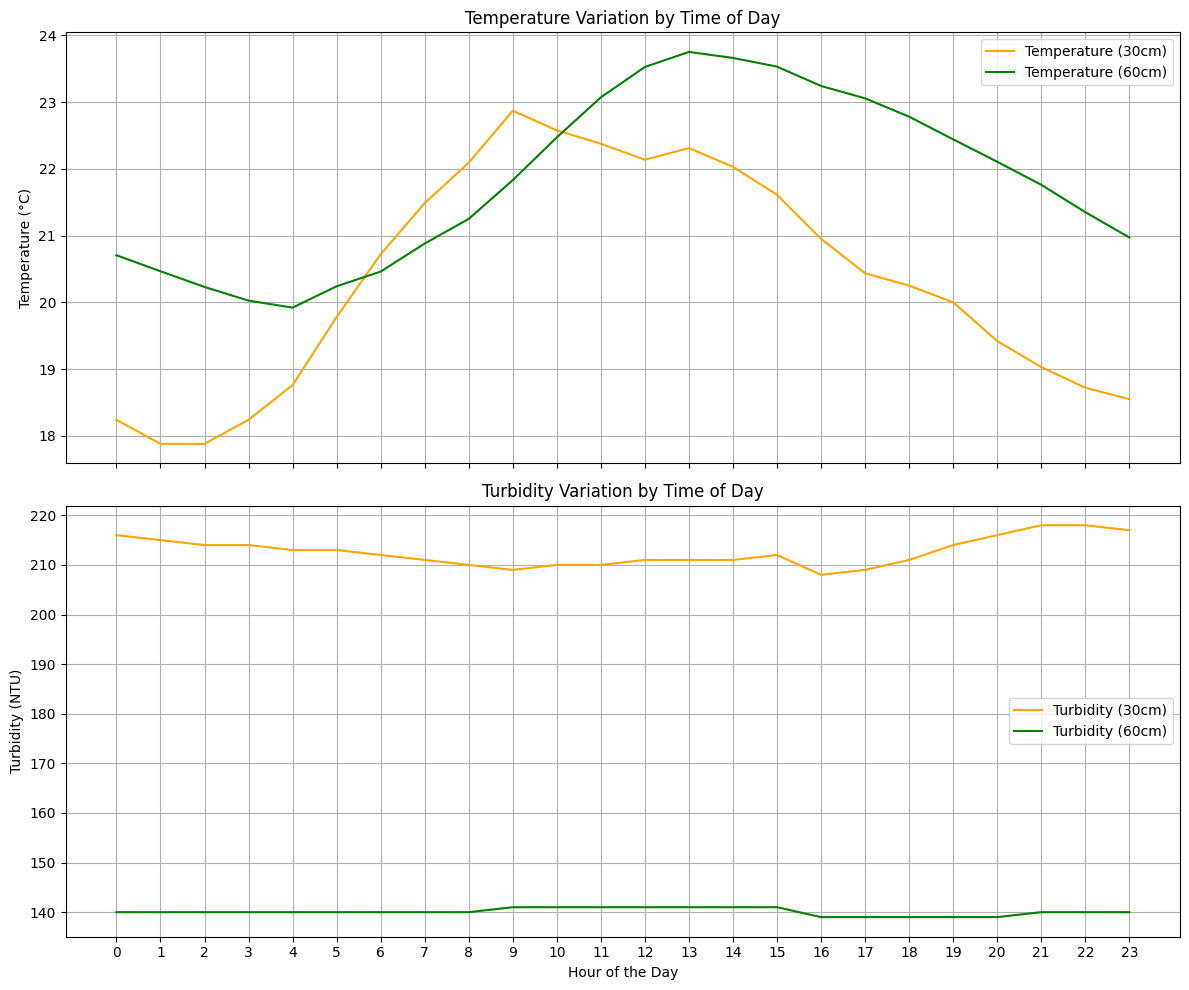

In [17]:
# Aggregate by hour to compute median values
data_30cm_hourly = data_30cm_no_date.groupby("Hour").median()
data_60cm_hourly = data_60cm_no_date.groupby("Hour").median()

# Create subplots for Temperature and Turbidity comparisons
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Define hours for x-ticks
hours = list(range(24))  # 0 to 23 hours

# Temperature Trends by Hour
sns.lineplot(data=data_30cm_hourly, x=data_30cm_hourly.index, y="Temperature", ax=axes[0], label="Temperature (30cm)", color="orange")
sns.lineplot(data=data_60cm_hourly, x=data_60cm_hourly.index, y="Temperature", ax=axes[0], label="Temperature (60cm)", color="green")
axes[0].set_title("Temperature Variation by Time of Day")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Temperature (°C)")
axes[0].legend()
axes[0].grid(True)
axes[0].set_xticks(hours)

# Turbidity Trends by Hour
sns.lineplot(data=data_30cm_hourly, x=data_30cm_hourly.index, y="Turbidity", ax=axes[1], label="Turbidity (30cm)", color="orange")
sns.lineplot(data=data_60cm_hourly, x=data_60cm_hourly.index, y="Turbidity", ax=axes[1], label="Turbidity (60cm)", color="green")
axes[1].set_title("Turbidity Variation by Time of Day")
axes[1].set_xlabel("Hour of the Day")
axes[1].set_ylabel("Turbidity (NTU)")
axes[1].legend()
axes[1].grid(True)
axes[1].set_xticks(hours)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

##Outlier detection for datasets using Z-score and IQR

In [18]:
# Detect outliers from data_30cm and data_60cm

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in 'Temperature', 'pH', and 'Turbidity' for both datasets
outliers_30cm_temp = detect_outliers(data_30cm, 'Temperature')
outliers_30cm_pH = detect_outliers(data_30cm, 'pH')
outliers_30cm_turbidity = detect_outliers(data_30cm, 'Turbidity')

outliers_60cm_temp = detect_outliers(data_60cm, 'Temperature')
outliers_60cm_turbidity = detect_outliers(data_60cm, 'Turbidity')

# Print for further analyze the outliers
print("Outliers in 30cm Temperature:", outliers_30cm_temp)
print("Outliers in 30cm pH:", outliers_30cm_pH)
print("Outliers in 30cm Turbidity:", outliers_30cm_turbidity)
print("Outliers in 60cm Temperature:", outliers_60cm_temp)
print("Outliers in 60cm Turbidity:", outliers_60cm_turbidity)

Outliers in 30cm Temperature: Empty DataFrame
Columns: [Date, Temperature, pH, Turbidity, Datetime, Hour]
Index: []
Outliers in 30cm pH: Empty DataFrame
Columns: [Date, Temperature, pH, Turbidity, Datetime, Hour]
Index: []
Outliers in 30cm Turbidity: Empty DataFrame
Columns: [Date, Temperature, pH, Turbidity, Datetime, Hour]
Index: []
Outliers in 60cm Temperature: Empty DataFrame
Columns: [Date, Temperature, Turbidity, Datetime, Hour]
Index: []
Outliers in 60cm Turbidity: Empty DataFrame
Columns: [Date, Temperature, Turbidity, Datetime, Hour]
Index: []


Conclusion: There are no outliers detected into datasets

#Data Modeling

###Classify for the water quality (Classes 0:poor, 1:moderate, and 2:optimal)

In [19]:
# thresholds based on data distribution for detecting water quality
def classify_water_quality_final(row):
    if row['Turbidity'] > 240 or row['Temperature'] < 16 or row['Temperature'] > 23:
        return 0  # Poor
    elif (220 <= row['Turbidity'] <= 240) and (18 <= row['Temperature'] <= 22):
        return 1  # Moderate
    elif (194 <= row['Turbidity'] < 220) and (19 <= row['Temperature'] <= 21):
        return 2  # Optimal
    else:
        return 1  # Default to Moderate if uncertain

In [20]:
# Apply new classification
data_30cm['Water_Quality'] = data_30cm.apply(classify_water_quality_final, axis=1)

# Display the updated dataset
data_30cm.head(-5)

,Date,Temperature,pH,Turbidity,Datetime,Hour,Water_Quality
0,2020-01-15 16:00:35,20.99,7.81,197,2020-01-15 16:00:35,16,2
1,2020-01-15 16:01:33,20.99,7.81,197,2020-01-15 16:01:33,16,2
2,2020-01-15 16:02:33,20.98,7.81,197,2020-01-15 16:02:33,16,2
3,2020-01-15 16:03:22,20.98,7.81,197,2020-01-15 16:03:22,16,2
4,2020-01-15 16:04:26,20.98,7.81,197,2020-01-15 16:04:26,16,2
...,...,...,...,...,...,...,...
9613,2020-01-22 16:11:02,21.37,7.48,212,2020-01-22 16:11:02,16,1
9614,2020-01-22 16:16:31,21.36,7.48,212,2020-01-22 16:16:31,16,1
9615,2020-01-22 16:17:39,21.36,7.49,212,2020-01-22 16:17:39,16,1
9616,2020-01-22 16:18:46,21.34,7.49,212,2020-01-22 16:18:46,16,1


In [21]:
# Check class distribution after applying new rules
data_30cm['Water_Quality'].value_counts()

,count
Water_Quality,
1,5259
0,2235
2,2129


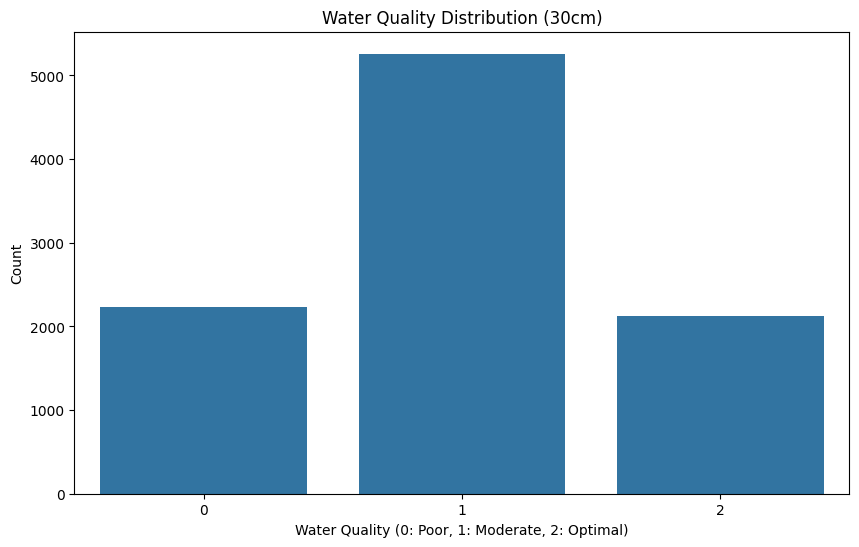

In [22]:
# plot with Water_Quality

import matplotlib.pyplot as plt
import seaborn as sns

# Water Quality Plot for 30cm
plt.figure(figsize=(10, 6))
sns.countplot(x='Water_Quality', data=data_30cm)
plt.title('Water Quality Distribution (30cm)')
plt.xlabel('Water Quality (0: Poor, 1: Moderate, 2: Optimal)')
plt.ylabel('Count')
plt.show()

In [23]:
# Apply new classification
data_60cm['Water_Quality'] = data_60cm.apply(classify_water_quality_final, axis=1)

# Display the updated dataset
data_60cm.head(-5)

,Date,Temperature,Turbidity,Datetime,Hour,Water_Quality
0,2020-01-15 16:00:35,22.54,134,2020-01-15 16:00:35,16,1
1,2020-01-15 16:01:33,22.54,134,2020-01-15 16:01:33,16,1
2,2020-01-15 16:02:33,22.54,134,2020-01-15 16:02:33,16,1
3,2020-01-15 16:03:22,22.54,134,2020-01-15 16:03:22,16,1
4,2020-01-15 16:04:26,22.54,134,2020-01-15 16:04:26,16,1
...,...,...,...,...,...,...
9613,2020-01-22 16:11:02,21.97,152,2020-01-22 16:11:02,16,1
9614,2020-01-22 16:16:31,21.98,152,2020-01-22 16:16:31,16,1
9615,2020-01-22 16:17:39,21.98,152,2020-01-22 16:17:39,16,1
9616,2020-01-22 16:18:46,21.99,152,2020-01-22 16:18:46,16,1


In [24]:
data_60cm['Water_Quality'].value_counts()

,count
Water_Quality,
1,7384
0,2239


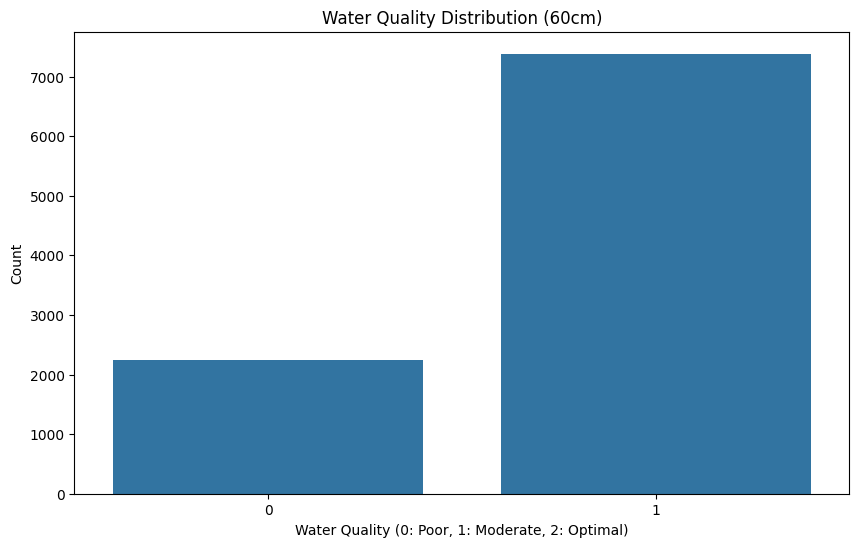

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Water Quality Plot for 30cm
plt.figure(figsize=(10, 6))
sns.countplot(x='Water_Quality', data=data_60cm)
plt.title('Water Quality Distribution (60cm)')
plt.xlabel('Water Quality (0: Poor, 1: Moderate, 2: Optimal)')
plt.ylabel('Count')
plt.show()

##LSTM model

This is a time-series data, so we will apply LSTM model for data modeling

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.1376 - val_loss: 0.0842
Epoch 2/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0893 - val_loss: 0.0833
Epoch 3/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0872 - val_loss: 0.0831
Epoch 4/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0878 - val_loss: 0.0827
Epoch 5/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0849 - val_loss: 0.0824
Epoch 6/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0860 - val_loss: 0.0823
Epoch 7/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0869 - val_loss: 0.0818
Epoch 8/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0844 - val_loss: 0.0844
Epoch 9/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0857 - val_loss: 0.0815
Epoch 10/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0851 - val_loss: 0.0814
Epoch 11/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0859 - val_loss: 0.0838
Epoch 12/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

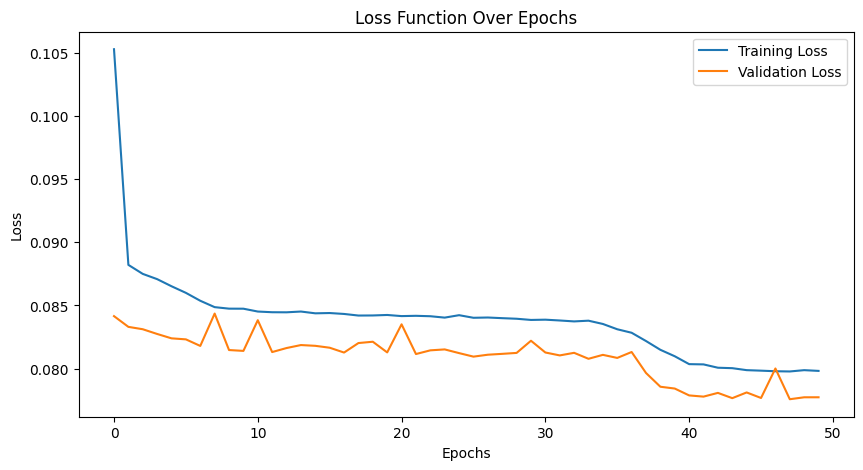

61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


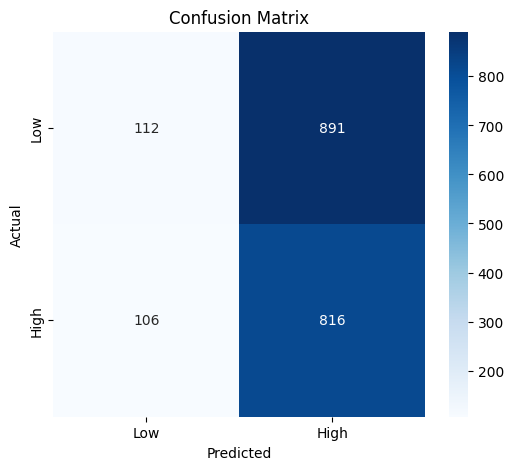

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Preprocessing function
def preprocess_data(df, include_pH=False):
    df = df.drop(columns=['Date'])  # Drop Date column
    scaler = MinMaxScaler()
    if include_pH:
        features = ['Temperature', 'pH']
    else:
        features = ['Temperature']
    target = 'Turbidity'

    X = df[features].values
    y = df[target].values

    # Normalize features
    X = scaler.fit_transform(X)
    y = scaler.fit_transform(y.reshape(-1, 1))

    # Reshape for LSTM (samples, time steps, features)
    X = X.reshape((X.shape[0], 1, X.shape[1]))

    return X, y, scaler

# Prepare data
X_30, y_30, scaler_30 = preprocess_data(data_30cm, include_pH=False)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_30, y_30, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history_30cm = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Plot training loss
plt.figure(figsize=(10,5))
plt.plot(history_30cm.history['loss'], label='Training Loss')
plt.plot(history_30cm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function Over Epochs')
plt.show()

# Predict on test set
y_pred = model.predict(X_test)

# Convert predictions and actual values back to original scale
y_pred_rescaled = scaler_30.inverse_transform(y_pred)
y_test_rescaled = scaler_30.inverse_transform(y_test)

# Convert to discrete categories (high/low turbidity)
threshold = np.median(y_test_rescaled)  # Using median as threshold
y_pred_class = (y_pred_rescaled > threshold).astype(int)
y_test_class = (y_test_rescaled > threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


482/482 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.1425 - val_loss: 0.1057
Epoch 2/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1054 - val_loss: 0.1033
Epoch 3/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1026 - val_loss: 0.1028
Epoch 4/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1032 - val_loss: 0.1025
Epoch 5/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1025 - val_loss: 0.1008
Epoch 6/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0997 - val_loss: 0.0973
Epoch 7/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0943 - val_loss: 0.0929
Epoch 8/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0911 - val_loss: 0.0913
Epoch 9/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0895 - val_loss: 0.0907
Epoch 10/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0925 - val_loss: 0.0903
Epoch 11/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0861 - val_loss: 0.0900
Epoch 12/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

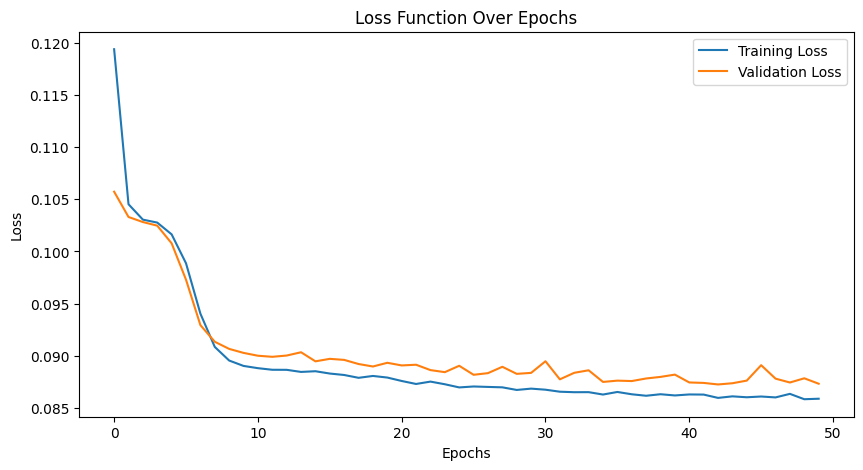

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


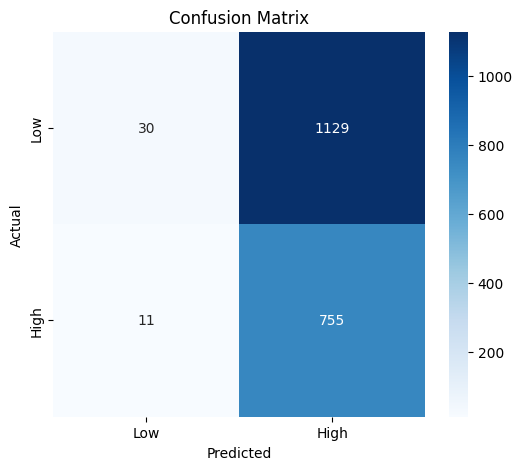

In [ ]:
# Prepare data
X_60, y_60, scaler_60 = preprocess_data(data_60cm, include_pH=False)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_60, y_60, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history_60cm = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Plot training loss
plt.figure(figsize=(10,5))
plt.plot(history_60cm.history['loss'], label='Training Loss')
plt.plot(history_60cm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function Over Epochs')
plt.show()

# Predict on test set
y_pred = model.predict(X_test)

# Convert predictions and actual values back to original scale
y_pred_rescaled = scaler_30.inverse_transform(y_pred)
y_test_rescaled = scaler_30.inverse_transform(y_test)

# Convert to discrete categories (high/low turbidity)
threshold = np.median(y_test_rescaled)  # Using median as threshold
y_pred_class = (y_pred_rescaled > threshold).astype(int)
y_test_class = (y_test_rescaled > threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Fine tune LSTM model

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


241/241 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - loss: 0.1673 - val_loss: 0.1069 - learning_rate: 0.0010
Epoch 2/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1100 - val_loss: 0.1043 - learning_rate: 0.0010
Epoch 3/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1012 - val_loss: 0.1014 - learning_rate: 0.0010
Epoch 4/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0999 - val_loss: 0.0943 - learning_rate: 0.0010
Epoch 5/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0948 - val_loss: 0.0919 - learning_rate: 0.0010
Epoch 6/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0923 - val_loss: 0.0916 - learning_rate: 0.0010
Epoch 7/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0919 - val_loss: 0.0910 - learning_rate: 0.0010
Epoch 8/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0915 - val_loss: 0.0910 - learning_rate: 0.0010
Epoch 9/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0891 - val_loss: 0.0900 - learning_rate: 0.0010
Epoch 10/10

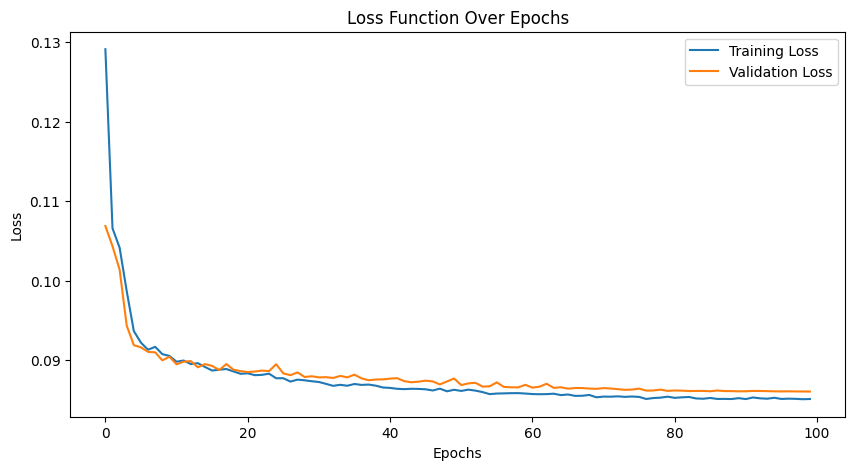

61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


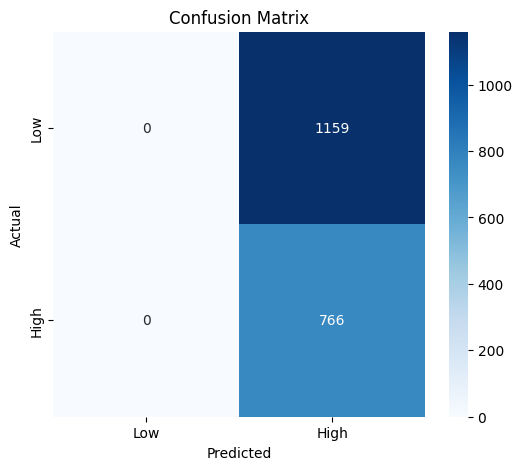

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Prepare data
X_60, y_60, scaler_60 = preprocess_data(data_60cm)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_60, y_60, test_size=0.2, random_state=42)

# Define Optimized LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile model with Adam optimizer and learning rate scheduling
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Add callbacks: Early Stopping & Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr], verbose=1)

# Plot training loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function Over Epochs')
plt.show()

# Predict on test set
y_pred = model.predict(X_test)

# Convert predictions and actual values back to original scale
y_pred_rescaled = scaler_60.inverse_transform(y_pred)
y_test_rescaled = scaler_60.inverse_transform(y_test)

# Convert to discrete categories (high/low turbidity)
threshold = np.median(y_test_rescaled)  # Using median as threshold
y_pred_class = (y_pred_rescaled > threshold).astype(int)
y_test_class = (y_test_rescaled > threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##  Alternative models for LSTM
| Model             | Use Case                | Pros                                   | Cons |
|------------------|------------------------|---------------------------------------|------|
| **BiLSTM**       | Time-series w/ patterns | Learns past & future relationships | Slightly slower |
| **Transformer**  | Long time-series        | Best accuracy, SOTA in AI            | Needs more data |
| **CNN-LSTM**     | Feature-rich time-series | Extracts key spatial & temporal info | More complex |
| **GRU**          | Simple fast training    | Fewer parameters, faster training    | May underperform BiLSTM |


We are going to try with BiLSTM model since it is best suited for this time-series data

##Alternative model for better accuracy - BiLSTM

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


241/241 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - loss: 0.1324 - val_loss: 0.0835 - learning_rate: 0.0010
Epoch 2/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0904 - val_loss: 0.0838 - learning_rate: 0.0010
Epoch 3/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0859 - val_loss: 0.0835 - learning_rate: 0.0010
Epoch 4/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0887 - val_loss: 0.0829 - learning_rate: 0.0010
Epoch 5/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0883 - val_loss: 0.0820 - learning_rate: 0.0010
Epoch 6/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0870 - val_loss: 0.0818 - learning_rate: 0.0010
Epoch 7/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0825 - val_loss: 0.0811 - learning_rate: 0.0010
Epoch 8/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0863 - val_loss: 0.0810 - learning_rate: 0.0010
Epoch 9/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0841 - val_loss: 0.0804 - learning_rate: 0.0010
Epoch 10/10

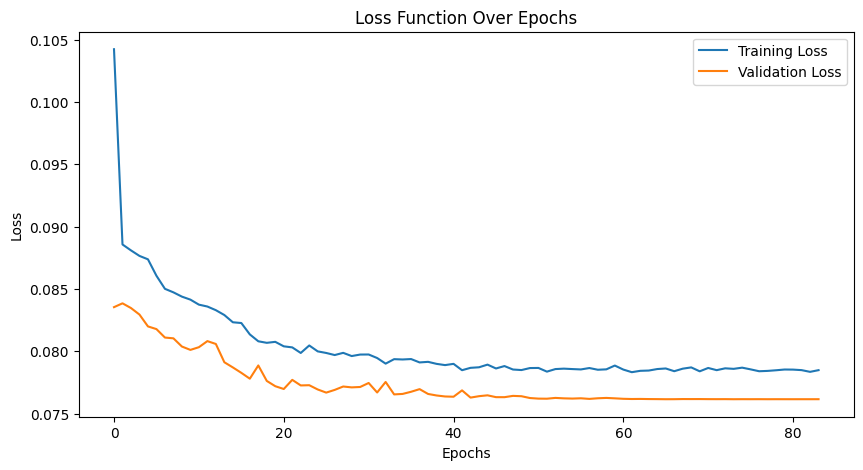

61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


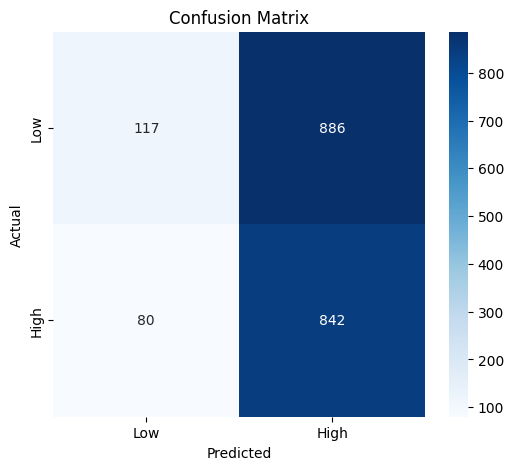

In [ ]:
from tensorflow.keras.layers import Bidirectional

#Prepare data
X_30, y_30, scaler_30 = preprocess_data(data_30cm)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_30, y_30, test_size=0.2, random_state=42)

# Define BiLSTM model
model = Sequential([
    Bidirectional(LSTM(100, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(100, activation='relu', return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(50, activation='relu')),
    Dropout(0.2),
    Dense(1)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# Add callbacks: Early Stopping & Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr], verbose=1)

# Plot training loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function Over Epochs')
plt.show()

# Predict on test set
y_pred = model.predict(X_test)

# Convert predictions and actual values back to original scale
y_pred_rescaled = scaler_30.inverse_transform(y_pred)
y_test_rescaled = scaler_30.inverse_transform(y_test)

# Convert to discrete categories (high/low turbidity)
threshold = np.median(y_test_rescaled)  # Using median as threshold
y_pred_class = (y_pred_rescaled > threshold).astype(int)
y_test_class = (y_test_rescaled > threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - loss: 0.1297 - val_loss: 0.0844 - learning_rate: 0.0010
Epoch 2/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0901 - val_loss: 0.0830 - learning_rate: 0.0010
Epoch 3/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0863 - val_loss: 0.0830 - learning_rate: 0.0010
Epoch 4/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0883 - val_loss: 0.0824 - learning_rate: 0.0010
Epoch 5/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0864 - val_loss: 0.0821 - learning_rate: 0.0010
Epoch 6/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0862 - val_loss: 0.0812 - learning_rate: 0.0010
Epoch 7/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0864 - val_loss: 0.0823 - learning_rate: 0.0010
Epoch 8/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0841 - val_loss: 0.0819 - learning_rate: 0.0010
Epoch 9/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0842 - val_loss: 0.0808 - learning_rate: 0.0010
Epoch 10/10

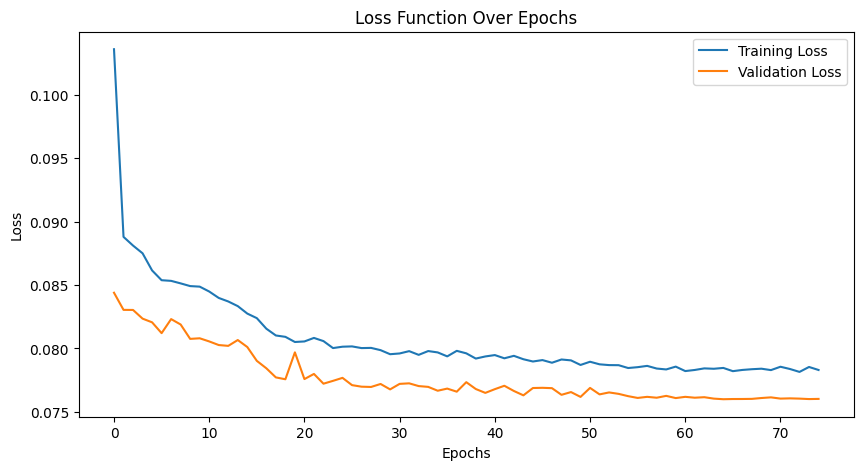

61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


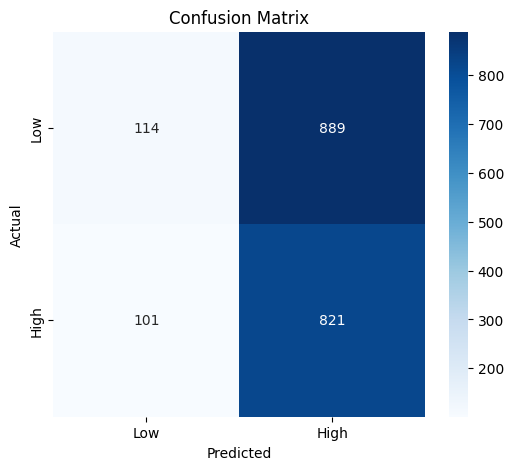

In [ ]:
from tensorflow.keras.layers import Bidirectional

# Define BiLSTM model
model = Sequential([
    Bidirectional(LSTM(100, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(100, activation='relu', return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(50, activation='relu')),
    Dropout(0.2),
    Dense(1)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# Add callbacks: Early Stopping & Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr], verbose=1)

# Plot training loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function Over Epochs')
plt.show()

# Predict on test set
y_pred = model.predict(X_test)

# Convert predictions and actual values back to original scale
y_pred_rescaled = scaler_60.inverse_transform(y_pred)
y_test_rescaled = scaler_60.inverse_transform(y_test)

# Convert to discrete categories (high/low turbidity)
threshold = np.median(y_test_rescaled)  # Using median as threshold
y_pred_class = (y_pred_rescaled > threshold).astype(int)
y_test_class = (y_test_rescaled > threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Print the model accuracy

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Convert predictions and actual values back to original scale
y_pred_rescaled = scaler_30.inverse_transform(y_pred)
y_test_rescaled = scaler_30.inverse_transform(y_test)

# Convert to discrete categories (high/low turbidity)
threshold = np.median(y_test_rescaled)  # Using median as threshold
y_pred_class = (y_pred_rescaled > threshold).astype(int)
y_test_class = (y_test_rescaled > threshold).astype(int)

# Compute Accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)

# Compute Regression Metrics
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Absolute Error (MAE): 12.1216
Mean Squared Error (MSE): 229.8885
R² Score: 0.0851


In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Convert predictions and actual values back to original scale
y_pred_rescaled = scaler_60.inverse_transform(y_pred)
y_test_rescaled = scaler_60.inverse_transform(y_test)

# Convert to discrete categories (high/low turbidity)
threshold = np.median(y_test_rescaled)  # Using median as threshold
y_pred_class = (y_pred_rescaled > threshold).astype(int)
y_test_class = (y_test_rescaled > threshold).astype(int)

# Compute Accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)

# Compute Regression Metrics
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Absolute Error (MAE): 4.4078
Mean Squared Error (MSE): 30.3985
R² Score: 0.0851


### Add column with predicted turbidity into dataset using BiLSTM


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional

# Prepare data
X_60, y_60, scaler_60 = preprocess_data(data_60cm)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_60, y_60, test_size=0.2, random_state=42)

# Define BiLSTM model
model = Sequential([
    Bidirectional(LSTM(100, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(100, activation='relu', return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(50, activation='relu')),
    Dropout(0.2),
    Dense(1)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on full dataset
y_pred = model.predict(X_60)

# Convert predictions back to original scale
y_pred_rescaled = scaler_60.inverse_transform(y_pred)

# Add predictions to dataframe
data_60cm["Predicted Turbidity"] = y_pred_rescaled

# Save updated dataset
data_60cm.to_excel("60cm_with_predictions.xlsx", index=False)

# Display first few rows with predictions
display(data_60cm)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - loss: 0.1627 - val_loss: 0.1052
Epoch 2/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1030 - val_loss: 0.0987
Epoch 3/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0975 - val_loss: 0.0911
Epoch 4/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 5/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0920 - val_loss: 0.0903
Epoch 6/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0901 - val_loss: 0.0900
Epoch 7/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0892 - val_loss: 0.0903
Epoch 8/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0914 - val_loss: 0.0901
Epoch 9/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0890 - val_loss: 0.0890
Epoch 10/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0896 - val_loss: 0.0887
Epoch 11/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0889 - val_loss: 0.0893
Epoch 12/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 

,Date,Temperature,Turbidity,Predicted Turbidity
0,2020-01-15 16:00:35,22.54,134,141.199524
1,2020-01-15 16:01:33,22.54,134,141.199524
2,2020-01-15 16:02:33,22.54,134,141.199524
3,2020-01-15 16:03:22,22.54,134,141.199524
4,2020-01-15 16:04:26,22.54,134,141.199524
...,...,...,...,...
9618,2020-01-22 16:21:01,22.00,152,140.831482
9619,2020-01-22 16:22:09,22.01,152,140.835144
9620,2020-01-22 16:23:16,22.01,152,140.835144
9621,2020-01-22 16:24:23,22.02,152,140.838974


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional

# Prepare data
X_30, y_30, scaler_30 = preprocess_data(data_30cm)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_30, y_30, test_size=0.2, random_state=42)

# Define BiLSTM model
model = Sequential([
    Bidirectional(LSTM(100, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(100, activation='relu', return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(50, activation='relu')),
    Dropout(0.2),
    Dense(1)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on full dataset
y_pred = model.predict(X_30)

# Convert predictions back to original scale
y_pred_rescaled = scaler_30.inverse_transform(y_pred)

# Add predictions to dataframe
data_30cm["Predicted Turbidity"] = y_pred_rescaled

# Save updated dataset
data_30cm.to_excel("30cm_with_predictions.xlsx", index=False)

# Display first few rows with predictions
display(data_30cm)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - loss: 0.1362 - val_loss: 0.0838
Epoch 2/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0906 - val_loss: 0.0835
Epoch 3/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0889 - val_loss: 0.0828
Epoch 4/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0880 - val_loss: 0.0823
Epoch 5/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0861 - val_loss: 0.0819
Epoch 6/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0835 - val_loss: 0.0813
Epoch 7/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0857 - val_loss: 0.0809
Epoch 8/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0842 - val_loss: 0.0808
Epoch 9/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0858 - val_loss: 0.0804
Epoch 10/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0839 - val_loss: 0.0804
Epoch 11/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0865 - val_loss: 0.0800
Epoch 12/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 

,Date,Temperature,pH,Turbidity,Predicted Turbidity
0,2020-01-15 16:00:35,20.99,7.81,197,215.588501
1,2020-01-15 16:01:33,20.99,7.81,197,215.588501
2,2020-01-15 16:02:33,20.98,7.81,197,215.588455
3,2020-01-15 16:03:22,20.98,7.81,197,215.588455
4,2020-01-15 16:04:26,20.98,7.81,197,215.588455
...,...,...,...,...,...
9618,2020-01-22 16:21:01,21.32,7.49,212,215.589996
9619,2020-01-22 16:22:09,21.32,7.49,212,215.589996
9620,2020-01-22 16:23:16,21.34,7.49,212,215.590073
9621,2020-01-22 16:24:23,21.34,7.50,212,215.590073


##Apply BiLSTM model for water quality prediction

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report

# Load your dataset
df = data_30cm

# Select features and target
features = ['Temperature', 'pH', 'Turbidity']
target = 'Water_Quality'

# Normalize features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Encode target labels
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Prepare input and output data
X = df[features].values
y = to_categorical(df[target])  # Convert labels to categorical for multi-class classification

# Reshape input for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the BiLSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, X.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Convert predictions to class labels
df["Predicted_Quality"] = np.argmax(y_pred, axis=1)

# Save the updated dataset
df.to_excel("Water_Quality_30cm_Predictions.xlsx", index=False)

print("Predicted water quality added to dataset and saved as 'Water_Quality_30cm_Predictions.xlsx'.")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


482/482 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5633 - loss: 0.9358 - val_accuracy: 0.5745 - val_loss: 0.7029
Epoch 2/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6370 - loss: 0.6908 - val_accuracy: 0.7662 - val_loss: 0.5368
Epoch 3/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7843 - loss: 0.5151 - val_accuracy: 0.8784 - val_loss: 0.3303
Epoch 4/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8752 - loss: 0.3173 - val_accuracy: 0.9112 - val_loss: 0.1971
Epoch 5/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8979 - loss: 0.2475 - val_accuracy: 0.9377 - val_loss: 0.1775
Epoch 6/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9060 - loss: 0.2264 - val_accuracy: 0.9397 - val_loss: 0.1479
Epoch 7/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9106 - loss: 0.2125 - val_accuracy: 0.9517 - val_loss: 0.1315
Epoch 8/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9214 - loss: 0.1843 - val_accuracy: 0.9600 - va

In [34]:
df.head(-5)

,Date,Temperature,pH,Turbidity,Datetime,Hour,Water_Quality,Predicted_Quality
0,2020-01-15 16:00:35,0.656516,0.572414,0.054545,2020-01-15 16:00:35,16,2,2
1,2020-01-15 16:01:33,0.656516,0.572414,0.054545,2020-01-15 16:01:33,16,2,2
2,2020-01-15 16:02:33,0.655298,0.572414,0.054545,2020-01-15 16:02:33,16,2,2
3,2020-01-15 16:03:22,0.655298,0.572414,0.054545,2020-01-15 16:03:22,16,2,2
4,2020-01-15 16:04:26,0.655298,0.572414,0.054545,2020-01-15 16:04:26,16,2,2
...,...,...,...,...,...,...,...,...
9613,2020-01-22 16:11:02,0.702801,0.344828,0.327273,2020-01-22 16:11:02,16,1,1
9614,2020-01-22 16:16:31,0.701583,0.344828,0.327273,2020-01-22 16:16:31,16,1,1
9615,2020-01-22 16:17:39,0.701583,0.351724,0.327273,2020-01-22 16:17:39,16,1,1
9616,2020-01-22 16:18:46,0.699147,0.351724,0.327273,2020-01-22 16:18:46,16,1,1


In [35]:
df['Water_Quality'].value_counts()

,count
Water_Quality,
1,5259
0,2235
2,2129


In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report

# Load your dataset
df_60cm = data_60cm

# Select features and target
features = ['Temperature', 'Turbidity']
target = 'Water_Quality'

# Normalize features
scaler = MinMaxScaler()
df_60cm[features] = scaler.fit_transform(df_60cm[features])

# Encode target labels
label_encoder = LabelEncoder()
df_60cm[target] = label_encoder.fit_transform(df_60cm[target])

# Prepare input and output data
X = df_60cm[features].values
y = to_categorical(df_60cm[target])  # Convert labels to categorical for multi-class classification

# Reshape input for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the BiLSTM model
model_60cm = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, X.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model_60cm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_60cm = model_60cm.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Make predictions on the entire dataset
y_pred = model_60cm.predict(X)

# Convert predictions to class labels
df_60cm["Predicted_Quality"] = np.argmax(y_pred, axis=1)

# Save the updated dataset
df_60cm.to_excel("Water_Quality_60cm_Predictions.xlsx", index=False)

print("Predicted water quality added to dataset and saved as 'Water_Quality_60cm_Predictions.xlsx'.")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


482/482 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5670 - loss: 0.9722 - val_accuracy: 0.6171 - val_loss: 0.8130
Epoch 2/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6149 - loss: 0.7840 - val_accuracy: 0.6660 - val_loss: 0.6397
Epoch 3/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7317 - loss: 0.5853 - val_accuracy: 0.9039 - val_loss: 0.3247
Epoch 4/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8699 - loss: 0.3374 - val_accuracy: 0.9184 - val_loss: 0.2022
Epoch 5/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8866 - loss: 0.2594 - val_accuracy: 0.9382 - val_loss: 0.1785
Epoch 6/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8989 - loss: 0.2260 - val_accuracy: 0.9439 - val_loss: 0.1513
Epoch 7/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9074 - loss: 0.2134 - val_accuracy: 0.9538 - val_loss: 0.1329
Epoch 8/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9104 - loss: 0.1994 - val_accuracy: 0.9517 -

In [38]:
df_60cm

,Date,Temperature,Turbidity,Datetime,Hour,Water_Quality,Predicted_Quality
0,2020-01-15 16:00:35,0.656516,0.054545,2020-01-15 16:00:35,16,2,2
1,2020-01-15 16:01:33,0.656516,0.054545,2020-01-15 16:01:33,16,2,2
2,2020-01-15 16:02:33,0.655298,0.054545,2020-01-15 16:02:33,16,2,2
3,2020-01-15 16:03:22,0.655298,0.054545,2020-01-15 16:03:22,16,2,2
4,2020-01-15 16:04:26,0.655298,0.054545,2020-01-15 16:04:26,16,2,2
...,...,...,...,...,...,...,...
9618,2020-01-22 16:21:01,0.696711,0.327273,2020-01-22 16:21:01,16,1,1
9619,2020-01-22 16:22:09,0.696711,0.327273,2020-01-22 16:22:09,16,1,1
9620,2020-01-22 16:23:16,0.699147,0.327273,2020-01-22 16:23:16,16,1,1
9621,2020-01-22 16:24:23,0.699147,0.327273,2020-01-22 16:24:23,16,1,1


In [40]:
df

,Date,Temperature,pH,Turbidity,Datetime,Hour,Water_Quality,Predicted_Quality
0,2020-01-15 16:00:35,0.656516,0.572414,0.054545,2020-01-15 16:00:35,16,2,2
1,2020-01-15 16:01:33,0.656516,0.572414,0.054545,2020-01-15 16:01:33,16,2,2
2,2020-01-15 16:02:33,0.655298,0.572414,0.054545,2020-01-15 16:02:33,16,2,2
3,2020-01-15 16:03:22,0.655298,0.572414,0.054545,2020-01-15 16:03:22,16,2,2
4,2020-01-15 16:04:26,0.655298,0.572414,0.054545,2020-01-15 16:04:26,16,2,2
...,...,...,...,...,...,...,...,...
9618,2020-01-22 16:21:01,0.696711,0.351724,0.327273,2020-01-22 16:21:01,16,1,1
9619,2020-01-22 16:22:09,0.696711,0.351724,0.327273,2020-01-22 16:22:09,16,1,1
9620,2020-01-22 16:23:16,0.699147,0.351724,0.327273,2020-01-22 16:23:16,16,1,1
9621,2020-01-22 16:24:23,0.699147,0.358621,0.327273,2020-01-22 16:24:23,16,1,1
